# 1. Import all packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from pandas import ExcelWriter

%matplotlib inline

# 2. Define list of all organisms: name, UniProt ID, Data file, Type

In [2]:
organisms = [
                    ["Escherichia coli",         "up000000625", 
                     'uniprot-proteome_UP000000625.xlsx', "Prokaryote"],
    
                    ["Helicobacter pylori",      "up000000429", 
                     'uniprot-proteome_UP000000429.xlsx', "Prokaryote"],
    
                    ["Bacillus subtilis",        "up000001570", 
                     'uniprot-proteome_UP000001570.xlsx', "Prokaryote"],
    
                    ["Dictyostelium discoideum", "up000002195",
                     'uniprot-proteome_UP000002195.xlsx', "Eukaryote, unicellular"],
    
                    ["Saccharomyces cerevisiae", "up000002311",
                     'uniprot-proteome_UP000002311.xlsx', "Eukaryote, unicellular"],
    
                    ["Drosophila melanogaster",  "up000000803", 
                     'uniprot-proteome_UP000000803.xlsx', "Eukaryote"],
    
                    ["Mus musculus",             "up000000589", 
                     'uniprot-proteome_UP000000589.xlsx', "Eukaryote"],
    
                    ["Danio rerio",                "up000000437", 
                     'uniprot-proteome_UP000000437.xlsx', "Eukaryote"],
    
                    ["Homo sapiens",             "up000005640", 
                     'uniprot-proteome_UP000005640.xlsx', "Eukaryote"],
            ]












# 3. Define protein composition nomenclature

In [3]:
oligomer_degree = [ 
                    ["Monomer",      1, "1-mer"], 
                    ["Homodimer",    2, "2-mer"],
                    ["Homotrimer",   3, "3-mer"],
                    ["Homotetramer", 4, "4-mer"],
                    ["Homopentamer", 5, "5-mer"],
                    ["Homohexamer",  6, "6-mer"],
                    ["Homoheptamer", 7, "7-mer"],
                    ["Homooctamer",  8, "8-mer"],
                  ]

# 4. Define Gene Ontology (GO) sub classes list

In [4]:
gene_ontology_ml =     [ 
                            ["GO_0003824","catalytic"],
                            ["GO_0005215","transporter"],
                            ["GO_0005488","binding"], 
                            ["GO_0140110","transcription regulator"]
                       ]

#gene_ontology_cc =     [ 
#                            ["GO_0044425", "membrane part"],
#                            ["GO_0044464", "cell part"]
#                            
#                      ]

gene_ontology_cc_cp =  [ 
                            ["GO_0031224", "intrinsic component of membrane"],
                            #["GO_0042597", "periplasmic space"],
                            ["GO_0005886", "plasma membrane"],                            
                            ["GO_0005829", "cytosol"]                            
                       ]

gene_ontology_bp     = [ 
                            ["GO_0008152", "metabolic process"],                            
                            ["GO_0009987", "cellular process"],
                            ["GO_0050896", "response to stimulus"],
                            ["GO_0051179", "localization"],
                            ["GO_0065007", "biological regulation"],    
                            ["GO_0071840", "cellular component organization"],
                       ]

gene_ontology_bp_mp  = [ 
                            ["GO_0006807", "nitrogen compound"],                            
                            ["GO_0009056", "catabolic process"],
                            ["GO_0009058", "biosynthetic process"],
                            ["GO_0055114", "oxidation-reduction process"],
                       ]


# 5. Define Gene Ontology (GO) classes list

In [5]:
gene_ontology =  [
                    ["Molecular function",                   
                     gene_ontology_ml,    "GO:0003674"],
    
#                    ["Cellular Component",                    
#                     gene_ontology_cc,    "GO:0005575"],
    
                    ["Cellular Component - cell part",        
                     gene_ontology_cc_cp, "GO:0044464"],
    
                    ["Biological process",                    
                     gene_ontology_bp,    "GO:0008150"],
    
                    ["Biological process - metabolic process",
                     gene_ontology_bp_mp, "GO:0008152"]
                 ]

# 6. Function that calculate frequency of homo-oligomers in proteome

In [6]:
def find_freq(df):
    df_freq = pd.DataFrame()    

    pro_count = np.zeros(len(oligomer_degree))

    for idx, degree in enumerate(oligomer_degree):
         pro_count[idx] = len(df[df['Subunit structure [CC]'].
                                 str.contains(degree[0], case=False,
                                                na=False)])
        
    pro_number = sum(pro_count)
    pro_freq = np.array([ pro_count / pro_number])
    
    df_freq = pd.DataFrame()
    df_freq["type"] = [i[2] for i in oligomer_degree] 
    df_freq["subunits"] = [i[1] for i in oligomer_degree] 
    df_freq["count"] = pro_count.T
    df_freq["frequency"] = pro_freq.T
    
    #print(pro_number)
    #print(df_freq)

    return df_freq, np.sum(pro_count)

# 7. Function that save results to ecxel file

In [7]:
def save_excel(df_all, exl_file):
    writer = ExcelWriter(exl_file)
    df_all.to_excel(writer)
    writer.save()

# 8. Procedure that calculate homo-oligomers distribution based on GO classification

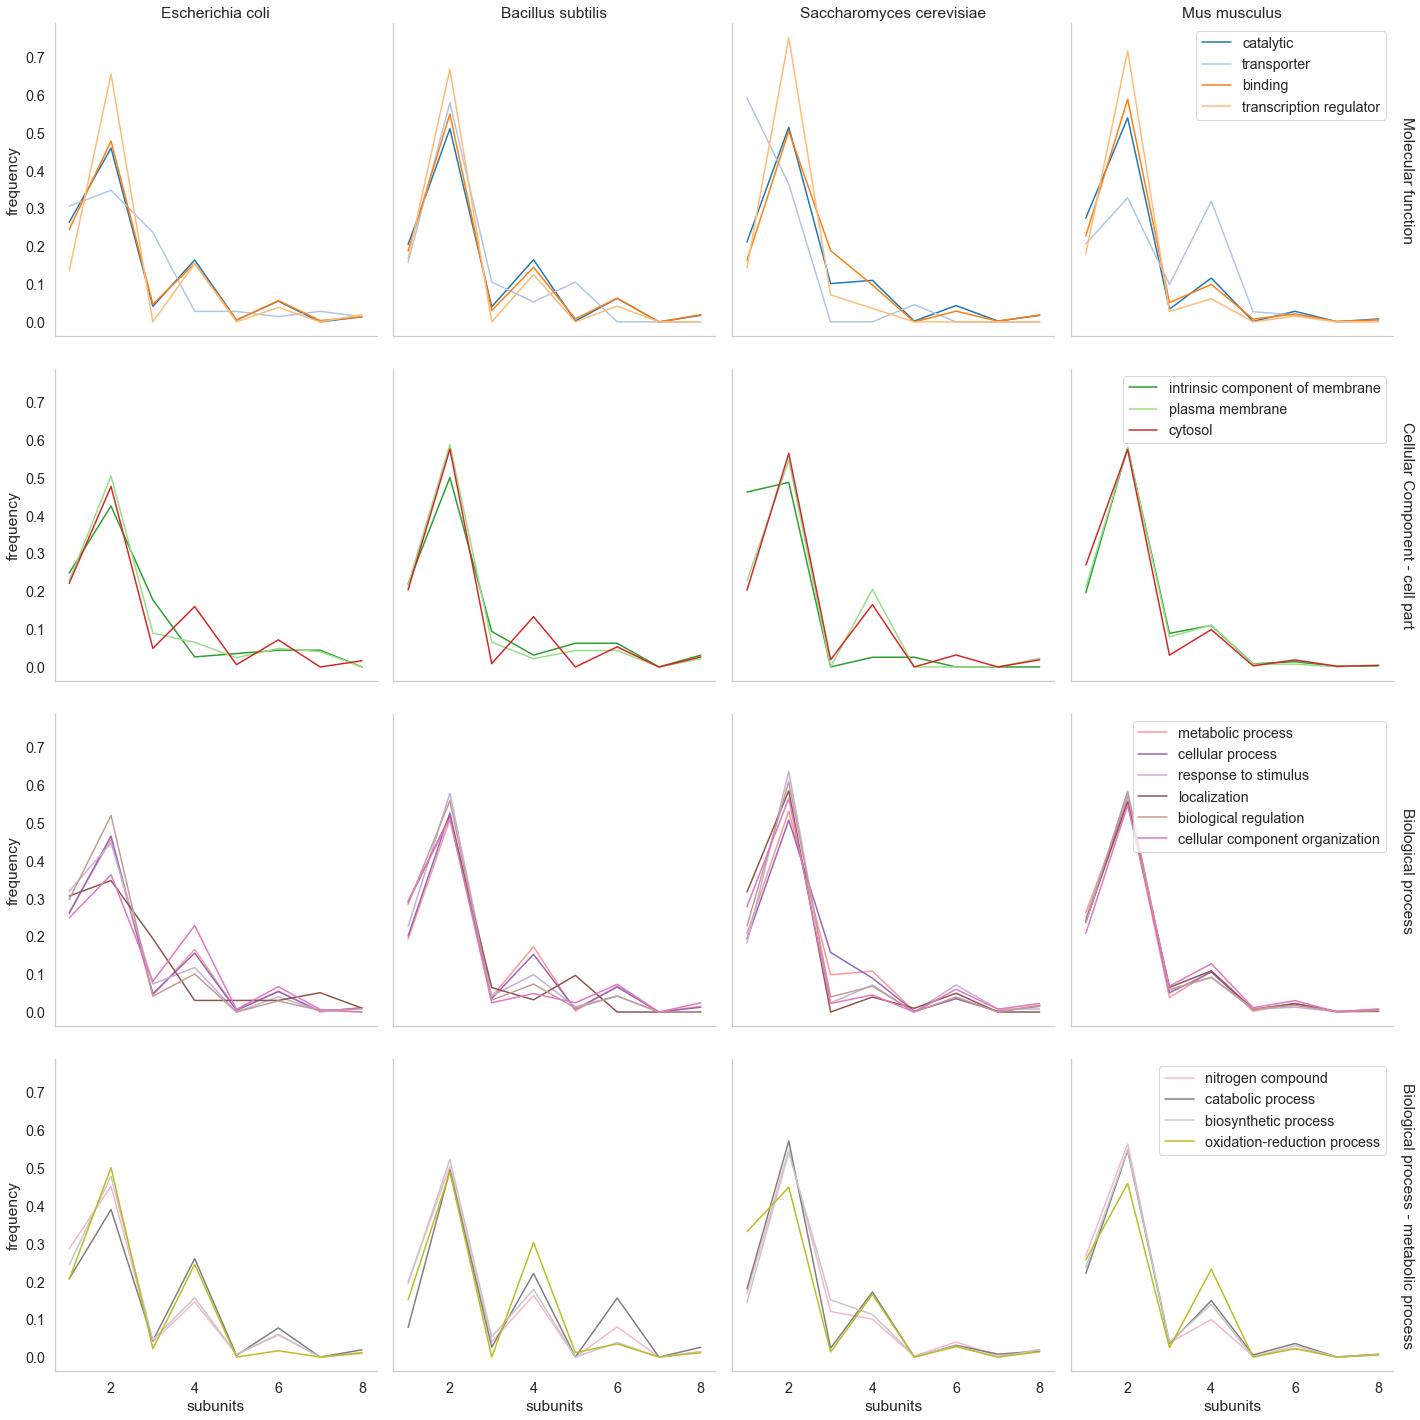

In [8]:
organims_GO = [organisms[0], organisms[2], organisms[4], organisms[6]]

sns.set(font_scale=1.3)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("tab20",plt.cm.tab20.N)

df_collection = [] 
df_all = pd.DataFrame()

for index1, go in enumerate(gene_ontology):
    
    #fig = plt.figure(figsize=(10,5))    
    #df_all = pd.DataFrame()
    
    #df_collection = [] 
          
    for index2, organism in enumerate(organims_GO):

        for sub_go in go[1]:
            file = r'.\%s\%s\uniprot_%s.xlsx' % (organism[0],go[0], sub_go[0])
            df_t,known = find_freq(pd.read_excel(file))

            if known >= 1:
                df_t["GO"] = sub_go[1]
                df_t["GO group"] = go[0]
                df_t["Organism"] = organism[0]
                df_collection.append(df_t)

        df_all = pd.concat(df_collection)
        
        #res_file_name = r'.\%s\%s\uniprot_report' % (organism[0],go[0])
        #save_excel(df_all, res_file_name + '.xlsx')
        
        #fig.add_subplot(1, 3, index + 1)
        #sns.lineplot(data=df_all, x = "subunits", y = "frequency", hue="GO", style='GO', 
        #             linewidth=1.5, markers=True, dashes=True).set_title(go[0]) 
        #plt.savefig(res_file_name + '.png')       
    
df_plot = df_all[['subunits', 'frequency','GO','Organism', 'GO group']]
grid = sns.FacetGrid(df_plot, col="Organism", row = 'GO group', hue = 'GO', margin_titles=True, height=5)   
grid.map(sns.lineplot, "subunits", "frequency")

[plt.setp(ax.texts, text="") for ax in grid.axes.flat] 
grid.set_titles(row_template = '{row_name}', col_template = '{col_name}')

#grid.add_legend();
grid.axes[0, 3].legend()
grid.axes[1, 3].legend()
grid.axes[2, 3].legend()
grid.axes[3, 3].legend()

plt.show()
grid.savefig('GO.png') 
    

# 9. Procedure that calculate homo-oligomers distribution over proteome for all organisms listed before

In [9]:
df_freq_proteome = pd.DataFrame() 
df_freq_proteome_ex = pd.DataFrame()  

for i,organim in enumerate(organisms):
    
    file = r'.\%s\uniprot-proteome_%s.xlsx' % (organim[0],organim[1])
    df_org,known = find_freq(pd.read_excel(file))
    df_org.drop('type',axis=1, inplace=True)
    df_org.drop('count',axis=1, inplace=True)
    df_org["organism"] = organim[0]
    df_freq_proteome = pd.concat([df_freq_proteome, df_org])
    df_freq_proteome_ex = pd.concat([df_freq_proteome_ex, 
                                     df_org.pivot_table("frequency", 'organism', 'subunits')])

df_freq_proteome_ex_even = df_freq_proteome_ex.drop([1,3,5,7], axis = 1)
df_freq_proteome_ex_odd = df_freq_proteome_ex.drop([2,4,6,8], axis = 1)

save_excel(df_freq_proteome_ex, 'proteome_freq.xlsx')
save_excel(df_freq_proteome_ex_even, 'proteome_freq_even.xlsx')
save_excel(df_freq_proteome_ex_odd, 'proteome_freq_odd.xlsx')

# 10. Procedure that calculate homo-oligomers distribution over proteome and save counts

In [10]:
df_count_proteome = pd.DataFrame() 
df_count_proteome_ex = pd.DataFrame()  

for i,organim in enumerate(organisms):
    
    file = r'.\%s\uniprot-proteome_%s.xlsx' % (organim[0],organim[1])
    df_org,known = find_freq(pd.read_excel(file))
    df_org.drop('type',axis=1, inplace=True)
    df_org.drop('frequency',axis=1, inplace=True)
    df_org["organism"] = organim[0]
    df_count_proteome = pd.concat([df_count_proteome, df_org])
    df_count_proteome_ex = pd.concat([df_count_proteome_ex, 
                                     df_org.pivot_table("count", 'organism', 'subunits')])

df_count_proteome_ex_even = df_count_proteome_ex.drop([1,3,5,7], axis = 1)
df_count_proteome_ex_odd = df_count_proteome_ex.drop([2,4,6,8], axis = 1)

save_excel(df_count_proteome_ex, 'proteome_count.xlsx')
save_excel(df_count_proteome_ex_even, 'proteome_count_even.xlsx')
save_excel(df_count_proteome_ex_odd, 'proteome_count_odd.xlsx')

# 11. Box plot with medians homo-oligomers distribution over proteome

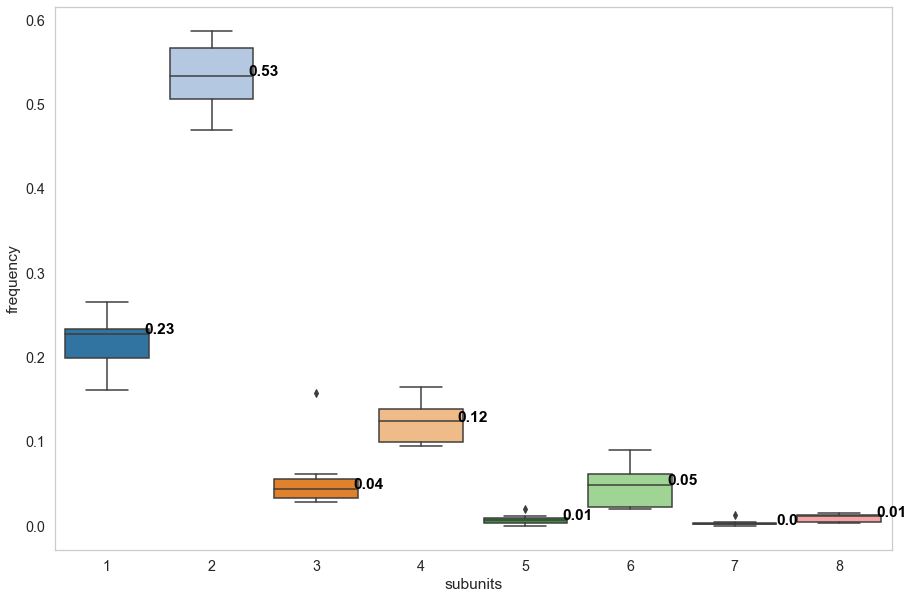

In [11]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="subunits", y = "frequency", data = df_freq_proteome)

medians = df_freq_proteome.groupby(['subunits'])['frequency'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick] + 0.5, medians[tick], median_labels[tick], 
            horizontalalignment='center', color='black', weight='semibold')
    
plt.savefig('proteome_freq1.png')


# 11. Line plot with medians homo-oligomers distribution over proteome

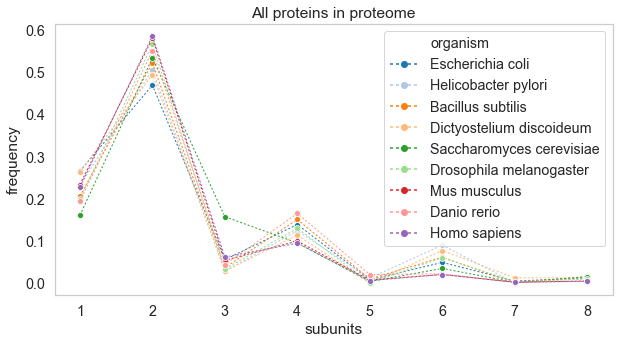

In [12]:
size=9
dash_styles = [(2,2) for x in range(size)] 
marker_styles = ['o' for x in range(size)] 

plt.figure(figsize=(10,5))
sns.lineplot(data=df_freq_proteome, x = "subunits", y = "frequency", 
             hue="organism", linewidth=1,
             style="organism", 
             markers=marker_styles, dashes=dash_styles).set_title("All proteins in proteome") 
plt.savefig('proteome_freq2.png')

<Figure size 2160x2160 with 0 Axes>

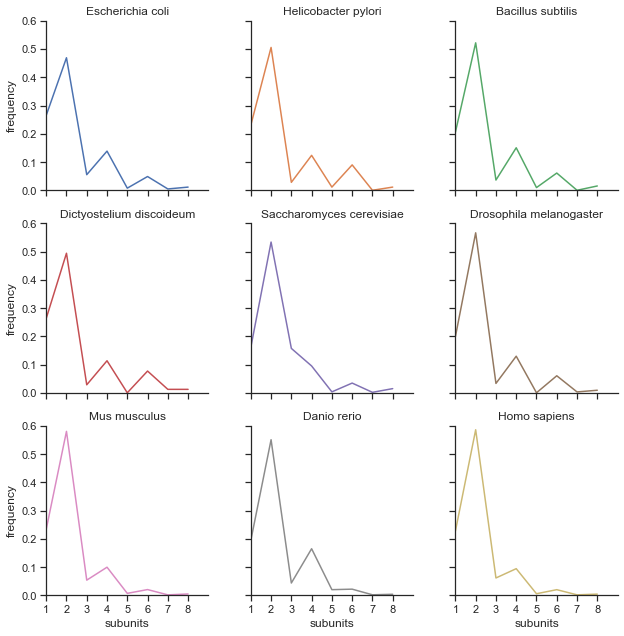

In [13]:
sns.set(style="ticks", color_codes=True)

plt.figure(figsize = (30, 30))

g = sns.FacetGrid(df_freq_proteome, col = 'organism', col_wrap=3, hue = 'organism', margin_titles=True)
g = g.map(plt.plot, 'subunits', "frequency").set(xlim=(1, 9), ylim=(0, 0.6), xticks=np.arange(1, 9, 1))
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

plt.show()

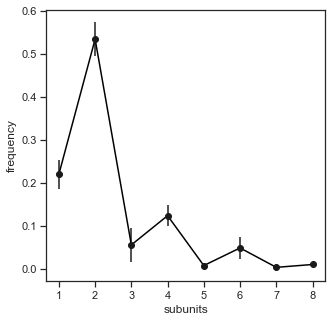

In [15]:
avg_f = np.array([0.219739581, 0.534149383, 0.0551763,  0.123225463,  0.007093241, 0.048107875, 0.002945018, 0.009563138])
std_f = np.array([0.033745957, 0.040207401, 0.04010942,  0.02513223,  0.006181336, 0.025843627, 0.003734849, 0.004471383])
subunits = np.arange(1,9)

plt.figure(figsize = (5, 5))

# ax = sns.distplot(x)
# ax.axvline(np.mean(x), color='r', linestyle='--')

ax = plt.plot(subunits, avg_f, c="black")
plt.errorbar(subunits, avg_f, yerr=std_f, fmt='ok');
plt.xlabel('subunits', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.show()